# Recreación de deglaciación según datos paleo-climáticos bibliográficos (M3)

El archivo 'Output/M3_CVMCh.xlsx' ya existe aquí
El archivo 'Output/M3_VH.xlsx' ya existe aquí
Radios interpol M3 del volcán CVMCh:
    volcan  tiempo   edad         Rt    ht        At       Vt
0    CVMCh       0  35000  58.459635  0.93  10736.48  9984.93
1    CVMCh     100  34900  58.461450  0.93  10737.15  9985.55
2    CVMCh     200  34800  58.463266  0.93  10737.82  9986.17
3    CVMCh     300  34700  58.465081  0.93  10738.48  9986.79
4    CVMCh     400  34600  58.466896  0.93  10739.15  9987.41
..     ...     ...    ...        ...   ...       ...      ...
346  CVMCh   34600    400   4.789658  0.15     72.07    10.81
347  CVMCh   34700    300   4.773899  0.15     71.60    10.74
348  CVMCh   34800    200   4.758139  0.15     71.13    10.67
349  CVMCh   34900    100   3.475254  0.12     37.94     4.55
350  CVMCh   35000      0   2.192368  0.09     15.10     1.36

[351 rows x 7 columns]
Radios interpol M3 del volcán VH:
    volcan  tiempo   edad          Rt    ht        At         Vt
0

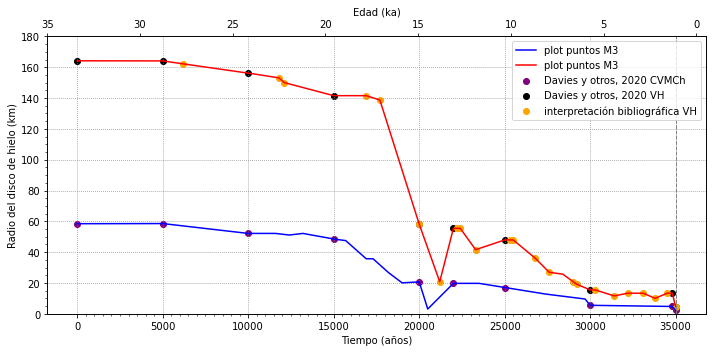

In [8]:
import pandas as pd #visualizar y trabajar con datos
import os #acceder a funcionalidades dependientes del Sistema Operativo\
import numpy as np
import matplotlib.pyplot as plt #visualizar datos (graficos, mapas...)
%matplotlib inline
import math #utilizar fórmulas matemáticas (raiz, pi...)

def save_excel_file(df, filename):
    if os.path.isfile(filename):
        print(f"El archivo '{filename}' ya existe aquí")
    else:
        df.to_excel(filename)
        print(f"El archivo '{filename}' se ha guardado")


r_estimados_CM = pd.read_excel('Input//data_M3//CVMCh_puntos_amarillos.xlsx')
r_estimados_VH = pd.read_excel('Input//data_M3//VH_puntos_amarillos.xlsx')

r_davies_CM = pd.read_excel('Input//data_M3//CVMCh_puntos-verdes.xlsx')
r_davies_VH = pd.read_excel('Input//data_M3//VH_puntos-verdes.xlsx')

datos_cvmch =pd.read_excel('Input//data_M3//plot_cvmch.xlsx')
datos_vh =pd.read_excel('Input//data_M3//plot_vh.xlsx')

#####################################
###########  CVMCh ###############
################################

volcan, edad, radio = datos_cvmch["volcan"], datos_cvmch["edad"], datos_cvmch["Rt_modif"]
edad_intervalo = np.arange(0, 35100, 100)

r_cada100 = np.interp(edad_intervalo, edad, radio).tolist()

superficie = [round((r ** 2) * math.pi, 2) for r in r_cada100]

k, y = 0.033, 1.36  # constant and exponent value
h = [round(k * (A ** (y - 1)), 2) for A in superficie]

volumen = [round(h[a] * superficie[a], 2) for a in range(len(h))]

tabla_cm = pd.DataFrame({
    "volcan": "CVMCh", 
    "tiempo": edad_intervalo, 
    "edad": edad_intervalo[::-1], 
    "Rt": r_cada100[::-1], 
    "ht": h[::-1], 
    "At": superficie[::-1], 
    "Vt": volumen[::-1]
})

filename_cvmch = "Output/M3_CVMCh.xlsx"
save_excel_file(tabla_cm, filename_cvmch)

####################################################################################################################################
####################################################################################################################################


#####################################
###########  V H ###############
################################


volcan, edad, radio = datos_vh["volcan"], datos_vh["edad"], datos_vh["Rt_modif"]
edad_intervalo = np.arange(0, 35100, 100)

r_cada100 = np.interp(edad_intervalo, edad, radio).tolist()

superficie = [round((r ** 2) * math.pi, 2) for r in r_cada100]

k, y = 0.033, 1.36  # constant and exponent value
h = [round(k * (A ** (y - 1)), 2) for A in superficie]

volumen = [round(h[a] * superficie[a], 2) for a in range(len(h))]

tabla_vh = pd.DataFrame({
    "volcan": "VH", 
    "tiempo": edad_intervalo, 
    "edad": edad_intervalo[::-1], 
    "Rt": r_cada100[::-1], 
    "ht": h[::-1], 
    "At": superficie[::-1], 
    "Vt": volumen[::-1]
})

filename_vh = "Output/M3_VH.xlsx"
save_excel_file(tabla_cm, filename_vh)

####################################################################################################################################
####################################################################################################################################

print("Radios interpol M3 del volcán CVMCh:")
print(tabla_cm)
print("Radios interpol M3 del volcán VH:")
print(tabla_vh)

####################################################################################################################################
####################################################################################################################################

fig, ax1  = plt.subplots(figsize=(10, 5))

mt=r_davies_CM['tiempo'] #tiempo datos davies para Mocho
mr=r_davies_CM['Radio (km)'] #radios datos davies para Mocho

vt=r_davies_VH['tiempo'] #tiempo datos davies para VH
vr=r_davies_VH['Radio (km)'] #radios datos davies para VH

ax1.scatter(mt,mr,label="Davies y otros, 2020 CVMCh",color = 'purple')
ax1.scatter(vt,vr,label="Davies y otros, 2020 VH",color = 'k')

#ax1.scatter(r_estimados_CM['tiempo'],r_estimados_CM['Rt_modif'], label="interpretación bibliográfica CMVCh",color = 'orange')
ax1.scatter(r_estimados_VH['tiempo'],r_estimados_VH['Rt'], label="interpretación bibliográfica VH",color = 'orange')


ax1.plot(tabla_cm['tiempo'],tabla_cm['Rt'],label="plot puntos M3",color = 'b')
ax1.plot(tabla_vh['tiempo'],tabla_vh['Rt'],label="plot puntos M3",color = 'r')

ax1.set_ylim(0,180)

#ax1.grid(b=True)

ax1.grid(linewidth=0.75, color='grey', linestyle='dotted')


ax1.set_ylabel("Radio del disco de hielo (km)", fontsize=10)
ax1.set_xlabel("Tiempo (años)", fontsize=10)


ax1.legend(loc='upper right')

ax2 = ax1.twiny()

ax2.invert_xaxis()
ax2.set_xlim (35.0,-0.5)

ax1.axvline(x= 35000,color="grey", linestyle="--",linewidth=1)

ax2.set_xlabel("Edad (ka)", labelpad=5, fontsize=10)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

xmajor_tick = np.arange(0, 35500, 5000)
xminor_tick = np.arange(0, 35200, 500)
ax1.set_xticks(xmajor_tick)
ax1.set_xticks(xminor_tick, minor=True)

ymajor_tick = np.arange(0, 181, 20)
yminor_tick = np.arange(0, 180, 5)
ax1.set_yticks(ymajor_tick)
ax1.set_yticks(yminor_tick, minor=True)
 
fig.tight_layout()